In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
submission=pd.read_csv("sample_submission.csv")


In [3]:
train

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [5]:
submission

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [7]:
train.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
train.drop(['id','Surname','CustomerId'],axis=1,inplace=True)
test.drop(['id','Surname','CustomerId'],axis=1,inplace=True)

In [9]:
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [10]:
for i in train:
    print(i,train[i].unique())

CreditScore [668 627 678 581 716 588 593 676 583 599 687 759 681 703 549 602 636 645
 559 773 554 553 714 616 586 785 834 632 746 797 753 749 413 611 752 551
 747 683 684 696 591 488 685 579 607 742 677 461 634 647 577 809 686 633
 494 699 663 756 648 563 682 620 721 652 535 584 701 640 711 707 631 637
 622 775 817 592 743 726 431 571 659 639 618 722 712 672 804 730 506 569
 558 507 594 796 615 619 471 434 706 758 762 635 630 709 661 644 731 748
 613 727 649 835 587 765 667 479 850 674 715 655 723 590 539 788 359 660
 517 740 694 578 610 718 705 542 624 601 625 596 770 695 662 567 744 595
 736 724 751 646 670 741 543 754 691 641 679 523 621 589 582 642 600 732
 698 469 525 520 470 692 532 651 605 792 638 671 540 821 822 557 689 521
 604 628 568 597 556 449 717 713 536 657 452 719 564 484 816 825 512 531
 818 745 527 774 738 547 708 603 725 477 680 443 562 580 729 710 574 447
 497 656 550 766 728 653 537 609 704 772 781 697 428 757 666 522 453 643
 612 501 585 735 510 544 565 755 505 83

In [11]:
for i in test:
    print(i,test[i].unique())

CreditScore [586 683 656 681 752 593 682 539 845 645 818 651 632 685 607 664 613 538
 680 543 666 781 631 671 559 639 554 732 624 516 587 662 754 667 661 738
 565 733 638 702 621 736 714 561 676 550 597 674 724 591 637 619 743 705
 706 709 451 573 549 739 455 646 650 711 778 648 652 701 749 633 731 693
 488 741 566 599 628 762 670 708 684 537 703 678 669 629 774 634 548 569
 476 590 584 644 710 486 598 462 581 585 568 622 600 699 757 716 616 530
 776 595 602 730 668 692 579 824 545 580 571 679 707 567 657 850 809 718
 519 660 775 552 589 452 477 842 697 768 583 594 529 689 746 588 653 712
 794 496 420 675 544 735 805 507 603 575 725 751 611 515 715 797 528 525
 800 767 592 640 745 663 626 764 719 558 526 686 687 501 766 615 727 605
 761 627 748 546 609 596 659 512 654 625 438 823 832 551 726 819 817 755
 677 641 696 790 577 704 753 729 793 454 521 617 578 643 688 721 695 673
 503 758 540 655 620 773 418 658 698 480 527 494 691 765 756 562 500 498
 614 642 535 479 532 508 524 759 556 60

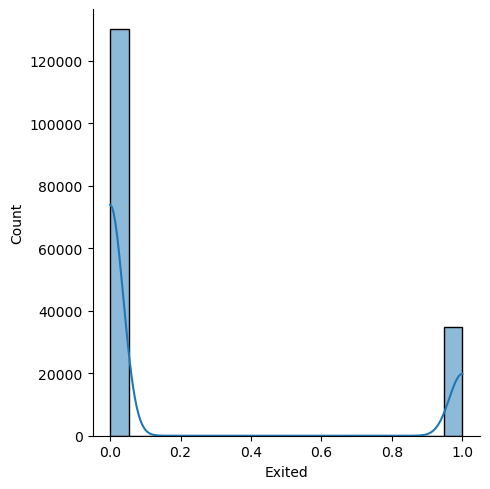

In [12]:
sns.displot(train['Exited'],kde=True)

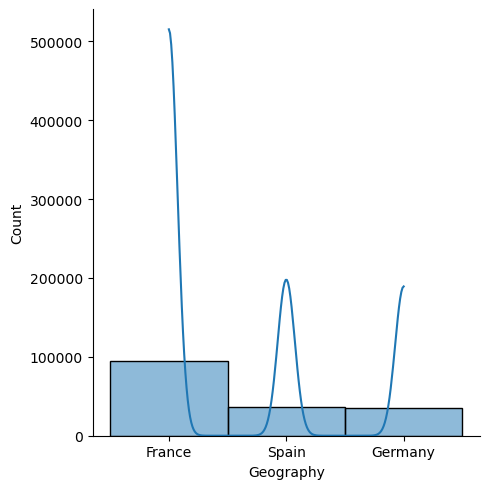

In [13]:
sns.displot(train['Geography'],kde=True)

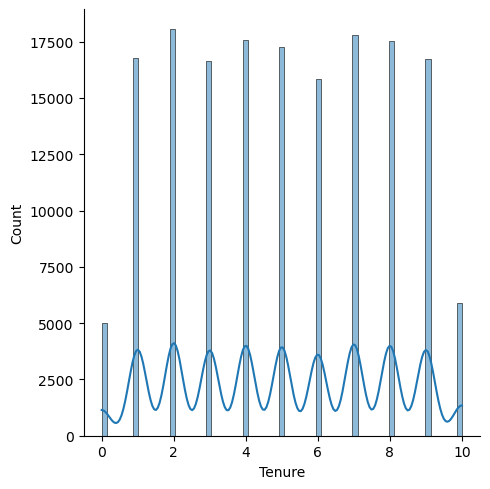

In [26]:
sns.displot(train['Tenure'],kde=True)

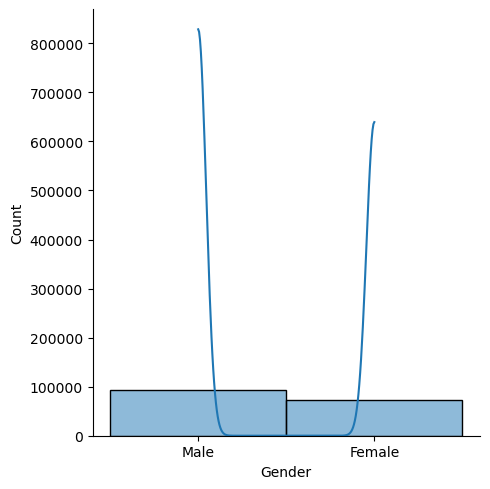

In [14]:
sns.displot(train['Gender'],kde=True)

<Axes: xlabel='Tenure', ylabel='Balance'>

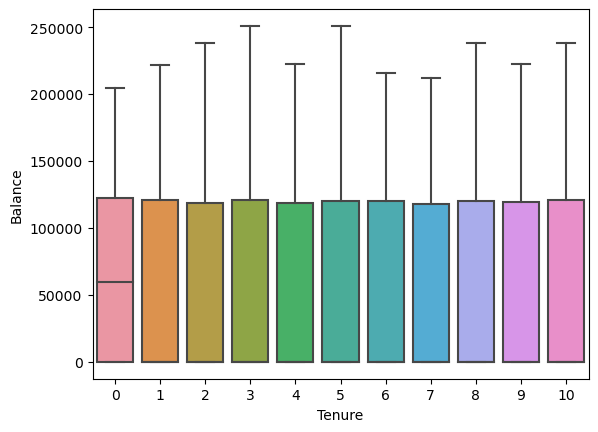

In [15]:
sns.boxplot(data=train,x='Tenure',y='Balance')

In [16]:
fix_df={'France':2,'Germany':3,'Spain':4,'Female':0,'Male':1}
train.replace(fix_df,inplace=True)
test.replace(fix_df,inplace=True)
train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,2,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,2,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,2,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,2,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,4,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,4,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,2,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,2,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,4,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [17]:
y=train.pop('Exited')
X=train
X_test=test

<Axes: >

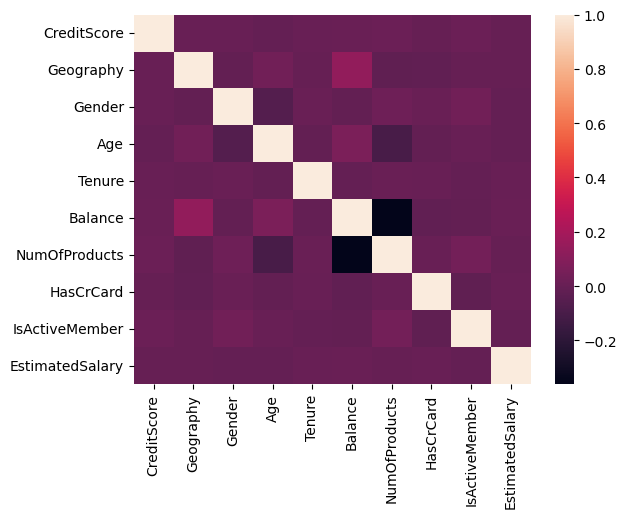

In [18]:
corr=X.corr()
sns.heatmap(corr)

In [19]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape)

(132027, 10) (132027,) (33007, 10) (33007,) (110023, 10)


In [20]:
clf = RandomForestClassifier(max_depth=7, class_weight='balanced', n_estimators=1000, random_state=42).fit(X_train, y_train)
print(clf.score(X_train, y_train))

0.8049262650821423


In [21]:
y_predii=clf.predict(X_val)
y_predii

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [22]:
account=balanced_accuracy_score(y_val,y_predii)
print(account)

0.8003534627366403


In [23]:
confu=confusion_matrix(y_val,y_predii)
confu

array([[20875,  5177],
       [ 1395,  5560]], dtype=int64)

In [25]:
prob=clf.predict_proba(X_val)
prob=prob[:,1]
prob

array([0.45744455, 0.10969298, 0.80480644, ..., 0.67105233, 0.08273593,
       0.27529874])